In [1]:
pip install pydantic
pip install pydantic-settings
pip install xlrd
pip install pandas-profiling
pip install ydata-profiling

In [15]:
import pandas as pd
from pydantic_settings import BaseSettings
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_excel(r"C:\\Users\Alex\Documents\GitHub\Responsible Lenders - ALM\default of credit card clients.xls", header=1)

In [7]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [1]:
# profile = ProfileReport(df, title="The Profile")
# profile

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

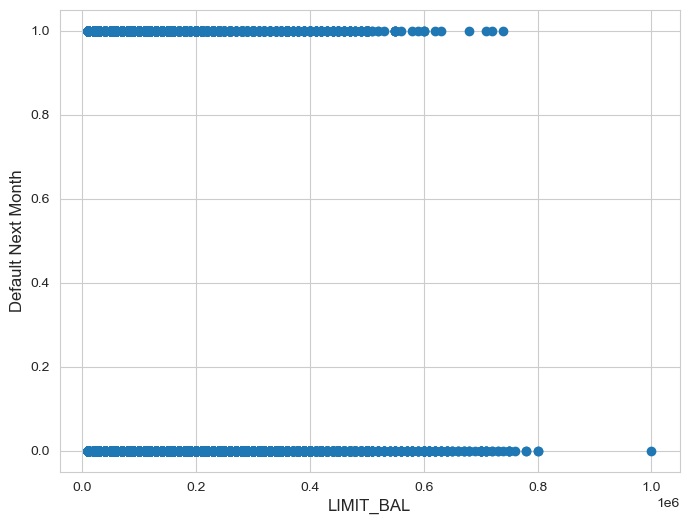

In [20]:
plt.figure(figsize=(8,6))

plt.scatter(df.LIMIT_BAL,
            df['default payment next month'])

plt.xlabel("LIMIT_BAL", fontsize=12)
plt.ylabel("Default Next Month", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

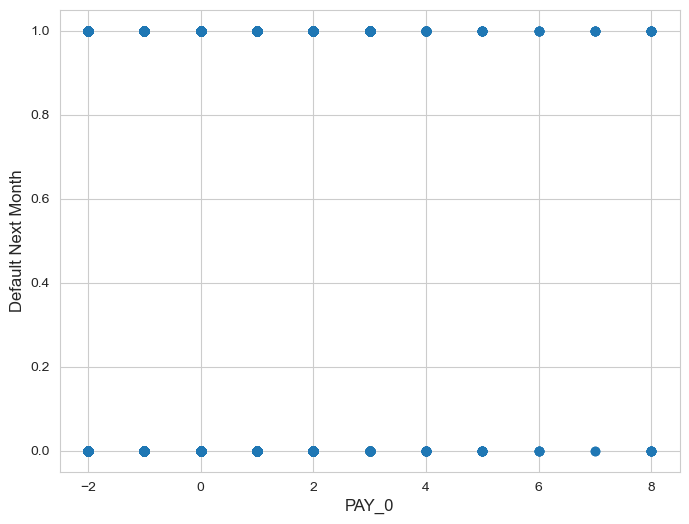

In [21]:
plt.figure(figsize=(8,6))

plt.scatter(df.PAY_0,
            df['default payment next month'])

plt.xlabel("PAY_0", fontsize=12)
plt.ylabel("Default Next Month", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

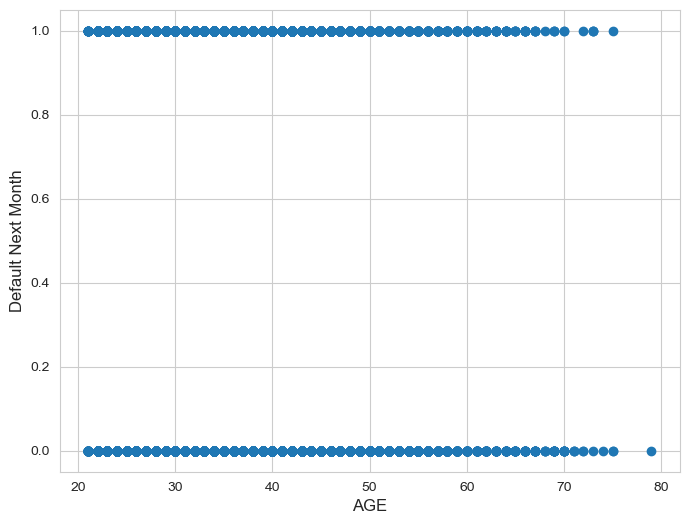

In [24]:
plt.figure(figsize=(8,6))

plt.scatter(df.AGE,
            df['default payment next month'])

plt.xlabel("AGE", fontsize=12)
plt.ylabel("Default Next Month", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

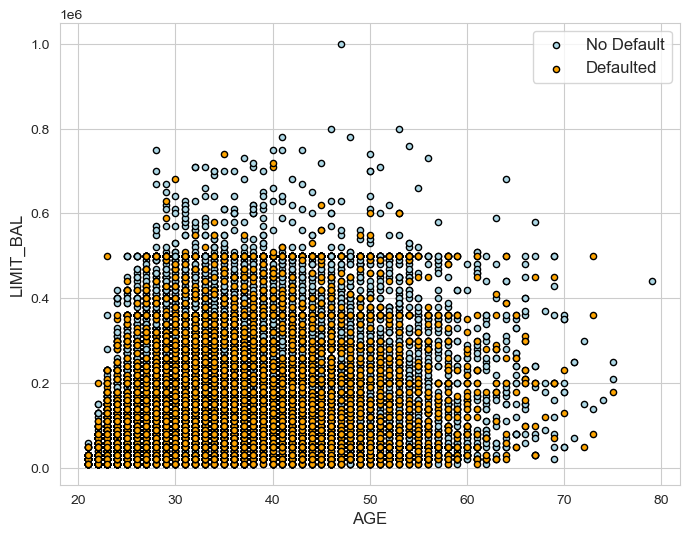

In [30]:
plt.figure(figsize=(8,6))

plt.scatter(df.loc[df['default payment next month']==0].AGE,
            df.loc[df['default payment next month']==0].LIMIT_BAL,
            label = "No Default",
            s = 20,
            edgecolor = "black",
            c = "lightblue"
           )
plt.scatter(df.loc[df['default payment next month']==1].AGE,
            df.loc[df['default payment next month']==1].LIMIT_BAL,
            label = "Defaulted",
            s = 20,
            edgecolor = "black",
            c = "orange"
           )

plt.xlabel("AGE", fontsize=12)
plt.ylabel("LIMIT_BAL", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.show()

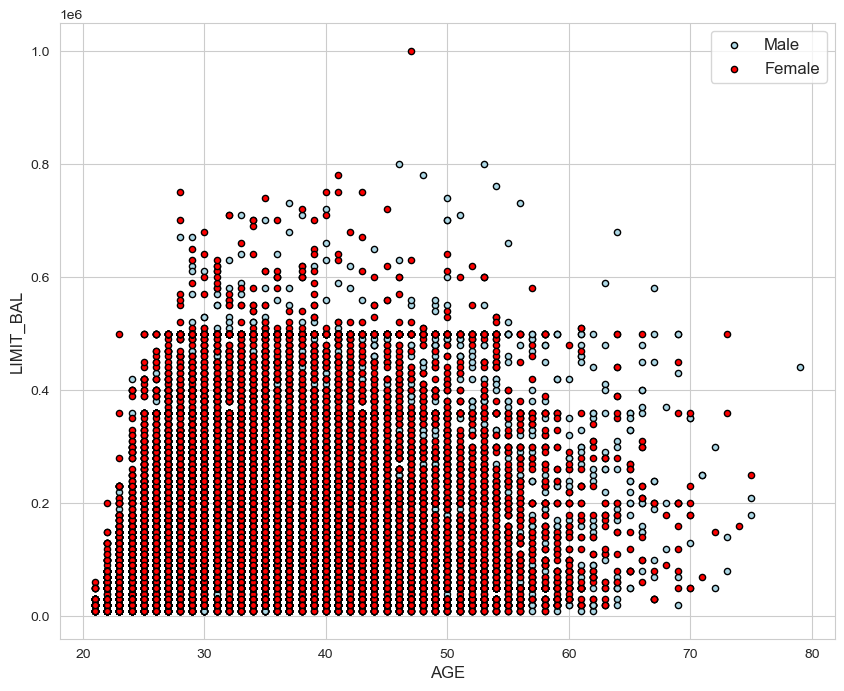

In [34]:
plt.figure(figsize=(10,8))

plt.scatter(df.loc[df['SEX']==1].AGE,
            df.loc[df['SEX']==1].LIMIT_BAL,
            label = "Male",
            s = 20,
            edgecolor = "black",
            c = "lightblue"
           )
plt.scatter(df.loc[df['SEX']==2].AGE,
            df.loc[df['SEX']==2].LIMIT_BAL,
            label = "Female",
            s = 20,
            edgecolor = "black",
            c = "red"
           )

plt.xlabel("AGE", fontsize=12)
plt.ylabel("LIMIT_BAL", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.show()

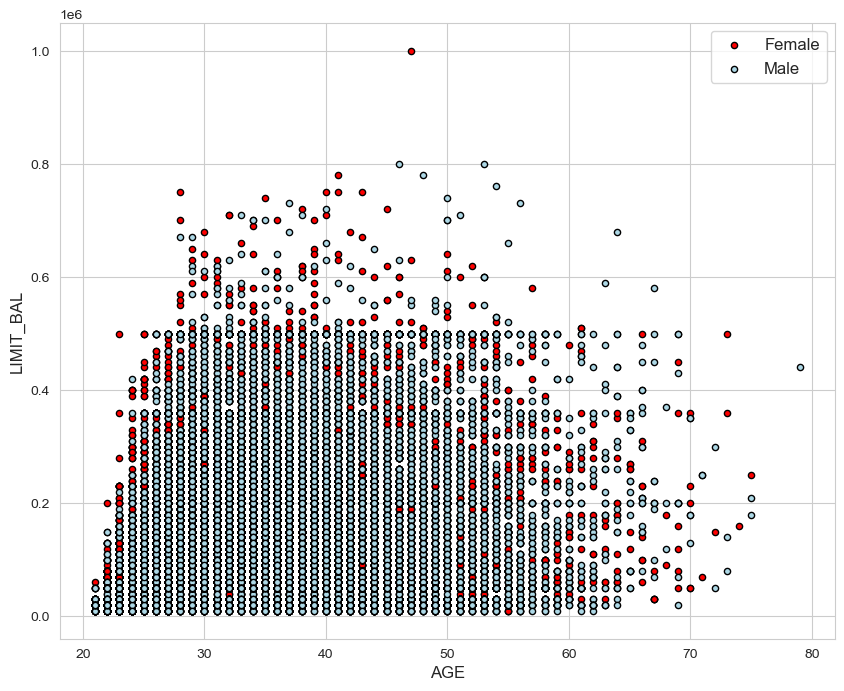

In [35]:
plt.figure(figsize=(10,8))


plt.scatter(df.loc[df['SEX']==2].AGE,
            df.loc[df['SEX']==2].LIMIT_BAL,
            label = "Female",
            s = 20,
            edgecolor = "black",
            c = "red"
           )
plt.scatter(df.loc[df['SEX']==1].AGE,
            df.loc[df['SEX']==1].LIMIT_BAL,
            label = "Male",
            s = 20,
            edgecolor = "black",
            c = "lightblue"
           )

plt.xlabel("AGE", fontsize=12)
plt.ylabel("LIMIT_BAL", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)

plt.show()